# Semiconductor Defect Detection by Hybrid Classical-Quantum Deep Learning

https://github.com/Yfyangd/CVPR2022

### 패키지 설치 

keras==2.6.0 / 
numpy==1.19.5 / 
matplotlib==3.3.2 / 
PennyLane==0.19.0 / 
tensorflow==2.3.1

In [1]:
%pip install -r requirements.txt

  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [282 lines of output]
      setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
      setup.py:480: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
        run_build = parse_setuppy_commands()
      Cythonizing sources
      Processing numpy/random\_bounded_integers.pxd.in
      Processing numpy/random\bit_generator.pyx
      Processing numpy/random\mtrand.pyx
      Processing numpy/random\_bounded_integers.pyx.in
      Processing numpy/random\_common.pyx
      Processing numpy/random\_generator.pyx
      Processing numpy/random\_mt19937.pyx
      Processing numpy/random\_pcg64.pyx
      Processing numpy/random\_philox.pyx
      Processing numpy/random\_sfc64.pyx
      blas_opt_info:
      blas_mkl_info:
   

In [2]:
%pip install --upgrade python==3.7.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python==3.7.0 (from versions: none)
ERROR: No matching distribution found for python==3.7.0


In [3]:
%pip install --upgrade tensorflow==2.3.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.3.1


### quantum_circuit.py

In [4]:
import pennylane as qml

n_qubits = 10
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights_0, weight_1):
    qml.RX(inputs[0], wires=0)
    qml.RX(inputs[1], wires=1)
    qml.Rot(*weights_0, wires=0)
    qml.RY(weight_1, wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

### Self_Attention.py

In [5]:
%pip install tensorflow.keras.layers 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.layers (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.layers


In [6]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install --update pip

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\snoop\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\snoop\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\snoop\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\snoop\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\snoop\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] <archive url/path> ...

no such option: --update


In [8]:
%pip install tensorflow.python.eager.context

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python.eager.context (from versions: none)
ERROR: No matching distribution found for tensorflow.python.eager.context


In [9]:
%pip install --upgrade tensorflow

In [10]:
%pip install keras==2.3.1


  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.3.1 which is incompatible.


In [2]:
import tensorflow.keras as keras

In [22]:
%pip installtensorflow==2.12.0

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "installtensorflow==2.12.0"



In [19]:
%pip install keras==2.12.0


  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.keras.layers import LayerNormalization, Conv2D, Layer, Activation

class Self_Attention_Block(Layer):

    def __init__(self, filters, ratio):
        super(Self_Attention_Block, self).__init__()
        self.conv0 = Conv2D(1, (1, 1), strides=(1, 1), padding='same',
                           use_bias=False, activation=None)        
        self.softmax = Activation('softmax')
        self.conv1 = Conv2D(int(filters / ratio), (1, 1), strides=(1, 1), padding='same',
                           use_bias=False, activation=None)
        self.LN = LayerNormalization()
        self.conv2 = Conv2D(int(filters), (1, 1), strides=(1, 1), padding='same',
                           use_bias=False, activation=None)
        self.relu = Activation('relu')
        self.hard_sigmoid = Activation('hard_sigmoid')

    def call(self, inputs):
        x = self.conv0(inputs)
        self_attention = self.softmax(x)
        x = x * self_attention
        x = self.relu(self.LN(self.conv1(x)))
        excitation = self.hard_sigmoid(self.conv2(x))
        x = inputs * excitation
        return x



### Self_Proliferate_and_Attention.py

In [4]:
import tensorflow as tf
from keras.layers import Conv2D, BatchNormalization, DepthwiseConv2D, Layer, Activation, add
from Self_Attention import Self_Attention_Block
from Self_Proliferate import Self_Proliferate_Block

class Self_Proliferate_and_Attention_Block(Layer):

    def __init__(self, dwkernel, strides, exp, out, ratio, use_se):
        super(Self_Proliferate_and_Attention_Block, self).__init__()
        self.strides = strides
        self.use_se = use_se
        self.conv = Conv2D(out, (1, 1), strides=(1, 1), padding='same',
                           activation=None, use_bias=False)
        self.relu = Activation('relu')
        self.depthconv1 = DepthwiseConv2D(dwkernel, strides, padding='same', depth_multiplier=ratio-1,
                                         activation=None, use_bias=False)
        self.depthconv2 = DepthwiseConv2D(dwkernel, strides, padding='same', depth_multiplier=ratio-1,
                                         activation=None, use_bias=False)
        for i in range(5):
            setattr(self, f"batchnorm{i+1}", BatchNormalization())
        self.SAB1 = Self_Proliferate_Block(exp, ratio, 1, 3)
        self.SAB2 = Self_Proliferate_Block(out, ratio, 1, 3)
        self.se = Self_Attention_Block(exp, ratio)

    def call(self, inputs):
        x = self.batchnorm1(self.depthconv1(inputs))
        x = self.batchnorm2(self.conv(x))

        y = self.relu(self.batchnorm3(self.SAB1(inputs)))
        if self.strides > 1:
            y = self.relu(self.batchnorm4(self.depthconv2(y)))
        if self.use_se:
            y = self.se(y)
        y = self.batchnorm5(self.SAB2(y))
        return add([x, y])



### Self_Proliferate.py

In [5]:
from keras.layers import Conv2D, Concatenate, DepthwiseConv2D, Layer, Activation
from math import ceil

class Self_Proliferate_Block(Layer):

    def __init__(self, out, ratio, convkernel, dwkernel):
        super(Self_Proliferate_Block, self).__init__()
        self.ratio = ratio
        self.out = out
        self.conv_out_channel = ceil(self.out * 1.0 / ratio)
        self.conv = Conv2D(int(self.conv_out_channel), (convkernel, convkernel), use_bias=False,
                           strides=(1, 1), padding='same', activation=None)
        self.depthconv = DepthwiseConv2D(dwkernel, 1, padding='same', use_bias=False,
                                         depth_multiplier=ratio-1, activation=None)
        self.concat = Concatenate()

    def call(self, inputs):
        x = self.conv(inputs)
        if self.ratio == 1:
            return x
        dw = self.depthconv(x)
        dw = dw[:, :, :, :int(self.out - self.conv_out_channel)]
        output = self.concat([x, dw])
        return output



### CosineAnnealing.py

In [6]:
import math
from keras import backend as K
from keras.callbacks import Callback


class CosineAnnealingScheduler(Callback):

    def __init__(self, T_max, eta_max, eta_min=0, verbose=0):
        super(CosineAnnealingScheduler, self).__init__()
        self.T_max = T_max
        self.eta_max = eta_max
        self.eta_min = eta_min
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = self.eta_min + (self.eta_max - self.eta_min) * (1 + math.cos(math.pi * epoch / self.T_max)) / 2
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nEpoch %05d: CosineAnnealingScheduler setting learning '
                  'rate to %s.' % (epoch + 1, lr))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

#test

### CycleLoss.py

In [7]:
import keras.losses as kls # add kls code

class CircleLoss(kls.Loss):
    
    def __init__(self,gamma: int = 64,margin: float = 0.25,batch_size: int = None,reduction='auto',name=None):
        super().__init__(reduction=reduction, name=name)
        self.gamma = gamma
        self.margin = margin
        self.O_p = 1 + self.margin
        self.O_n = -self.margin
        self.Delta_p = 1 - self.margin
        self.Delta_n = self.margin
        if batch_size:
            self.batch_size = batch_size
            self.batch_idxs = tf.expand_dims(tf.range(0, batch_size, dtype=tf.int32), 1)  # shape [batch,1]

    def call(self, y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
        alpha_p = tf.nn.relu(self.O_p - tf.stop_gradient(y_pred))
        alpha_n = tf.nn.relu(tf.stop_gradient(y_pred) - self.O_n)
        y_true = tf.cast(y_true, tf.float32)
        y_pred = (y_true * (alpha_p * (y_pred - self.Delta_p)) 
                  + (1 - y_true) * (alpha_n * (y_pred - self.Delta_n))
                 ) * self.gamma
        return tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)

### Hybrid_CNN.py

In [18]:
import pennylane as qml
from sklearn.multiclass import OutputCodeClassifier
import tensorflow as tf
from keras.layers import GlobalAveragePooling2D, Conv2D, BatchNormalization, Reshape, Activation, add
from Self_Proliferate_and_Attention import Self_Proliferate_and_Attention_Block
from quantum_circuit import qnode

class SPANet(tf.keras.Model):
    
    def __init__(self, classes):
        super(SPANet, self).__init__()
        self.classes = classes
        self.img_input = tf.keras.layers.Input(shape=(1, 512, 512, 3))
        self.conv1 = Conv2D(16, (3, 3), strides=(2, 2), padding='same',
                            activation=None, use_bias=False)
        self.conv2 = Conv2D(960, (1, 1), strides=(1, 1), padding='same',
                            activation=None, use_bias=False)
        self.conv3 = Conv2D(1280, (1, 1), strides=(1, 1), padding='same',
                            activation=None, use_bias=False)
        self.conv4 = Conv2D(self.classes, (1, 1), strides=(1, 1), padding='same',
                            activation=None, use_bias=False)

        #Quantum Layer
        self.weight_shapes = {"weights_0": 3, "weight_1": 1}
        self.qlayer = qml.qnn.KerasLayer(qnode, self.weight_shapes, output_dim=self.classes)
        
        
        for i in range(3):
            setattr(self, f"batchnorm{i+1}", BatchNormalization())
        self.relu = Activation('relu')
        self.softmax = Activation('softmax')
        self.pooling = GlobalAveragePooling2D()

        self.dwkernels = [3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5]
        self.strides = [1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
        self.exps = [16, 48, 72, 72, 120, 240, 200, 184, 184, 480, 672, 672, 960, 960, 960, 960]
        self.outs = [16, 24, 24, 40, 40, 80, 80, 80, 80, 112, 112, 160, 160, 160, 160, 160]
        self.ratios = [2] * 16
        self.use_sa = [False, False, False, True, True, False, False, False,
                        False, True, True, True, False, True, False, True]
        for i, args in enumerate(zip(self.dwkernels, self.strides, self.exps, self.outs, self.ratios, self.use_sa)):
            setattr(self, f"Self_Proliferate_and_Attention_Block{i}", Self_Proliferate_and_Attention_Block(*args))

    def call(self, inputs):
        x = self.relu(self.batchnorm1(self.conv1(inputs)))
        # Iterate through Ghost Bottlenecks
        for i in range(16):
            x = getattr(self, f"Self_Proliferate_and_Attention_Block{i}")(x)
        x = self.relu(self.batchnorm2(self.conv2(x)))
        x = self.pooling(x)
        x = Reshape((1, 1, int(x.shape[1])))(x)
        x = self.relu(self.batchnorm3(self.conv3(x)))
        x = self.conv4(x)
        x = tf.squeeze(x, 1)
        x = tf.squeeze(x, 1)
        FC = tf.keras.layers.Dense(classes, activation="softmax")
        model = tf.keras.models.Sequential([x, self.qlayer, FC])
        model = tf.keras.Model(self.img_input,x)
        return OutputCodeClassifier



# SP&A test copy

link : https://github.com/Yfyangd/SPA/blob/main/SP%26A-Net-Test-Run.ipynb

In [9]:
import tensorflow.python.keras.engine

In [10]:
# Import Tensorflow & Keras
from tensorflow import keras
from keras.models import Model
from keras.layers import *
from keras.regularizers import l2
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.utils import get_source_inputs
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras import backend as K
from keras.utils import to_categorical
from math import ceil
from keras.layers import Input,MaxPooling2D, GlobalAveragePooling2D, Conv2D, Concatenate, BatchNormalization, DepthwiseConv2D, Lambda, Reshape, Layer, Activation, add
from keras.layers import LayerNormalization
import math
from keras.callbacks import Callback

import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:

# Import DataSets
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

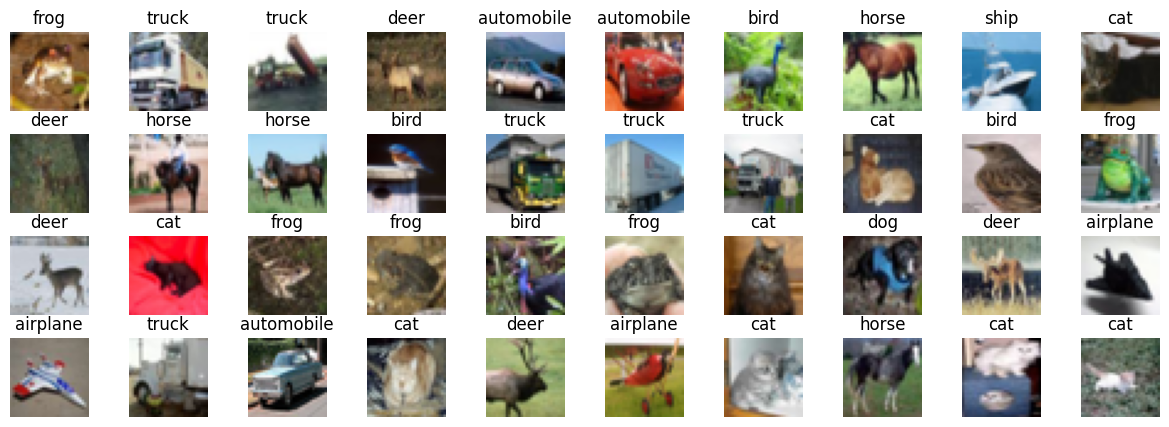

In [13]:
import matplotlib.pyplot as plt
# dict
dictionary={1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck",0:"airplane"}
# visualizing training samples
plt.figure(figsize=(15,5))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(train_images[i].reshape((32, 32, 3)),cmap=plt.cm.hsv)
    plt.title(dictionary[train_labels[i][0]])
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [14]:
# Normalize pixel values to be between 0 and 1
train_images.astype('float32');test_images.astype('float32')
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
# Encoding
train_labels = to_categorical(np.array(train_labels[:, 0]))
test_labels = to_categorical(np.array(test_labels[:, 0]))

In [19]:
classes = 10
model = SPANet(classes=10)
model.compile(optimizer='Nadam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.build(input_shape=(1, 512, 512, 3))
# model.call(train_images)
# model.summary()
model.fit(train_images, test_images)

ValueError: Data cardinality is ambiguous:
  x sizes: 50000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [20]:
classes = 10
model = SPANet(classes=10)
model.compile(optimizer='Nadam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10


TypeError: Exception encountered when calling layer 'spa_net_3' (type SPANet).

The added layer must be an instance of class Layer. Received: layer=[[-4.37852472e-01  1.41058981e-01 -2.29018584e-01 -2.81929016e-01
   1.35830402e+00  1.49464023e+00  8.53053987e-01  1.94663548e+00
  -8.91515672e-01  1.11760783e+00]
 [-4.09156010e-02 -1.06812632e+00  1.67354316e-01  1.07157499e-01
   4.92692947e-01  1.66931719e-01  1.00457430e-01  2.88705677e-02
  -2.76275635e+00  1.36558080e+00]
 [ 3.45520407e-01 -1.31724596e+00 -1.86075819e+00  1.42163527e+00
   2.96979576e-01  2.55709195e+00  4.69929963e-01  1.62108803e+00
  -1.42581558e+00  2.01583219e+00]
 [-9.03726161e-01 -1.47883785e+00 -9.71817315e-01  4.74533737e-01
  -5.75122952e-01 -3.28179240e-01  1.03368402e-01  4.94906068e-01
  -6.55764222e-01  1.20165777e+00]
 [-3.55395675e-03 -1.26176572e+00 -1.47000480e+00  3.29593062e-01
   4.65206742e-01  3.27531129e-01 -7.29990005e-01  1.65890718e+00
  -7.94103384e-01  6.62389100e-01]
 [ 1.79711640e-01 -1.57565880e+00 -6.23293281e-01  1.88392448e+00
   1.64547527e+00  1.10395312e+00 -2.32255316e+00  5.13082564e-01
  -4.11729783e-01  6.95614100e-01]
 [-9.92063165e-01 -6.51278675e-01 -7.28408456e-01  7.90612519e-01
  -4.23376292e-01  1.53501320e+00  9.20077324e-01  1.22414076e+00
  -3.76296759e-01  1.70263863e+00]
 [-4.94746387e-01 -2.89997101e-01 -1.97805905e+00  5.26024342e-01
   1.42120272e-01  7.43371904e-01 -4.89060998e-01  1.24252367e+00
  -5.53730279e-02 -7.64953792e-02]
 [ 8.32060426e-02 -1.17718577e+00 -9.80728120e-03  1.41550660e+00
  -8.78928721e-01  1.03738517e-01 -5.74157715e-01  2.41650671e-01
  -1.38837099e+00  4.10790563e-01]
 [ 8.52516294e-02  4.50392455e-01 -1.61764431e+00 -2.22654998e-01
  -1.46518171e+00  9.49196756e-01  4.25706983e-01  1.21355891e-01
  -7.27029443e-01  6.08291328e-02]
 [-1.02697420e+00 -1.17485672e-01 -1.65972304e+00  6.54456437e-01
   2.91920900e-02  2.84609032e+00  4.51623350e-01  1.78477049e+00
  -1.24943805e+00 -8.08074772e-02]
 [ 2.67814100e-02 -2.23338842e+00 -1.24785423e+00  7.87895501e-01
  -3.16928983e-01  6.60752654e-01  4.22509611e-01  6.72004461e-01
  -1.72722077e+00  1.69699287e+00]
 [ 4.88187045e-01 -5.78369737e-01  1.17415145e-01  5.91429889e-01
   4.47143018e-01  1.68344438e+00  7.50080466e-01  1.04513764e+00
  -1.28782582e+00 -2.51358747e-01]
 [-9.24470484e-01 -1.60874343e+00 -8.67367148e-01 -6.65449023e-01
   1.26534268e-01  3.97743344e-01  1.96029139e+00  2.15825582e+00
  -9.98689950e-01  1.28397393e+00]
 [-5.01336098e-01 -9.04986918e-01 -2.05693555e+00  2.58888900e-01
  -3.23847532e-01  1.30755568e+00  3.01883876e-01  3.61454630e+00
   3.16975057e-01  9.51862574e-01]
 [-2.07928956e-01 -6.58180773e-01 -4.99235570e-01  1.35502505e+00
  -5.48371792e-01  1.38663876e+00  3.58614802e-01  2.15726590e+00
  -5.24319410e-01  1.60363460e+00]
 [-5.71804494e-02 -1.89288557e+00 -9.65855896e-01  5.19472837e-01
  -7.02425778e-01  1.41144657e+00 -7.02129602e-01  1.59692943e+00
   7.04646111e-01 -8.76772404e-01]
 [-2.67413497e-01 -5.43747604e-01 -1.21981072e+00  4.44578797e-01
   5.88473022e-01 -2.94504941e-01  9.14927602e-01  8.96758437e-01
  -5.10479331e-01  1.04408848e+00]
 [ 8.88395846e-01  1.81663796e-01  8.68334413e-01  5.79231143e-01
  -3.44651222e-01  1.95096087e+00  5.03544033e-01  1.00086915e+00
  -2.30255485e+00  6.03705466e-01]
 [-8.78719687e-02 -9.64896798e-01 -1.84594846e+00  8.64854753e-01
  -2.60143876e-02  6.76005900e-01  1.13503146e+00  1.47587156e+00
  -8.74797821e-01  2.26542425e+00]
 [ 6.38908207e-01 -7.58831978e-01 -8.79785120e-02 -5.56120217e-01
   7.56978214e-01  6.08429968e-01 -1.28677702e+00  4.78491843e-01
  -8.28360319e-01  1.60222888e+00]
 [-1.18104291e+00  1.36373603e+00 -2.46286416e+00  4.91506159e-01
  -1.00991404e+00  2.27625513e+00 -7.38672733e-01 -2.12513566e-01
  -8.72428715e-02  1.39995790e+00]
 [-2.71856785e-04  7.67798722e-02 -1.74405646e+00  1.43784833e+00
   7.59189665e-01  1.01269674e+00 -2.39314675e-01  6.02017879e-01
   6.93739891e-01  6.73236012e-01]
 [ 1.94029272e-01  9.70417023e-01 -1.04304302e+00  2.26081944e+00
   9.39083099e-03  1.57721770e+00  5.66088676e-01  1.73417544e+00
  -8.09255600e-01  9.46008503e-01]
 [-4.70951557e-01  6.85493946e-01 -1.66749704e+00 -6.68727100e-01
   1.73337221e+00  1.86062098e+00  9.58765209e-01  5.62454462e-01
   8.76595080e-03  1.67700243e+00]
 [ 1.29876673e-01 -5.58956206e-01 -9.27480340e-01 -4.68120351e-02
   4.96844113e-01  1.22986507e+00  7.49998033e-01  8.12367201e-01
  -2.75156069e+00  7.23615050e-01]
 [-3.94246906e-01 -1.13129568e+00 -9.29390907e-01 -2.92079091e-01
   1.61573005e+00  1.08739567e+00 -9.48346555e-02  1.13400638e-01
  -3.68916124e-01  1.85474753e+00]
 [ 8.54951739e-02 -1.46502995e+00  7.60651946e-01  4.22266126e-02
  -1.12852418e+00 -4.12086487e-01  2.24535018e-01  4.91705775e-01
  -6.76860690e-01  1.83835173e+00]
 [-3.67466956e-01 -3.53626341e-01 -1.16368306e+00 -3.34857464e-01
  -4.39145386e-01  2.22797298e+00  8.15878212e-01  1.98565769e+00
  -1.16370237e+00  2.13006353e+00]
 [-6.50724888e-01  2.02224240e-01 -7.29806364e-01 -1.03848726e-01
   2.25613475e-01  1.89039338e+00  8.85503292e-01  1.63780618e+00
  -4.47412670e-01  5.63694715e-01]
 [ 1.84767866e+00 -3.18402588e-01 -1.26589906e+00  4.02733088e-01
   1.41010606e+00  4.85490352e-01  1.24206185e-01  1.87253416e+00
  -1.35527360e+00  8.27164829e-01]
 [-1.19641572e-01 -7.08661079e-01 -1.63781524e+00  1.31709313e+00
   2.67397225e-01  5.98309994e-01 -7.20915556e-01  2.60759234e-01
  -1.49385822e+00  7.89893389e-01]] of type <class 'tensorflow.python.framework.ops.EagerTensor'>.

Call arguments received by layer 'spa_net_3' (type SPANet):
  • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split

# split dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# create the model and compile it
model = SPANet(classes=10)
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model on training data
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

NameError: name 'images' is not defined

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.25)

Epoch 1/20


TypeError: Exception encountered when calling layer 'spa_net_9' (type SPANet).

The added layer must be an instance of class Layer. Received: layer=[[-1.0707325   0.35946545 -0.36448586  0.18484575  0.30937243 -0.86814654
   0.86931646  0.1143778  -0.7374137   1.0351512 ]
 [-1.746577    0.76710975  0.47329822  0.6085797  -1.1025133   0.04409582
   0.43880293 -1.076239    1.0562972   0.69147974]
 [-1.1207312  -0.2981642  -0.7388267  -0.27889276 -1.5082787   0.8147646
   0.5778305   0.72252375  0.3627838  -0.37137562]
 [-1.5251431   0.34452084  0.6887926   0.92085266 -1.0081916   0.50108314
   0.52922523 -0.5824959   0.4468243  -0.08692077]
 [-0.7482172   0.595385    0.6044071   2.0484126  -0.98762834  0.89202607
   0.26007795 -0.28697956  0.00636625 -0.21856645]
 [ 0.12593186  0.28926313 -0.3406895   1.6879056  -1.5655202   0.18518868
   0.86457694 -0.5026672   0.83782053  1.6210421 ]
 [-0.34208816  1.5095849   0.12130526  2.0318542   0.2873621   0.51383
   0.22337946 -1.3021578   0.175964    1.0116718 ]
 [-1.2373854  -0.53656447 -0.9557281   1.6242156  -0.8577117  -0.65489864
   2.1267548  -1.4135356   1.0890136   0.97175574]
 [-1.1371014   0.22514497 -0.84728575  0.19490984 -0.19331358 -0.09470612
  -0.3165679   0.5541813   0.05415256  0.7448157 ]
 [-1.819485    0.70425344  0.94239783  2.3093717  -0.1359777  -0.8982289
   2.008434   -1.3312839   0.97258204  0.44226325]
 [-3.4534204  -0.34040642 -0.80481255  0.689734   -1.2155471  -0.10798398
   1.5155686  -1.1909453   0.5776184   0.09665269]
 [-1.102363    1.5753729  -2.9774106   0.4632265  -0.63489324  3.057613
   2.0035388  -1.0810192   1.6179447  -1.3035372 ]
 [-0.88146806  1.4334832   0.03565689 -0.0577271  -1.6088922  -0.30546385
   0.42156044 -0.9542415   0.5574623   1.3306912 ]
 [-0.21979731 -0.16572     0.7749836   0.89813846 -0.39927042 -1.3392991
  -0.32559842 -0.7294093   0.41518116  0.83559334]
 [-0.53261006  0.4732727  -0.8026956   0.28521693 -0.68978155  0.15173128
   1.4950069  -0.8866768   0.15381679 -0.29286385]
 [-0.37529182  0.270692    0.11718157  1.1325366  -2.2096004   0.7564658
   0.51125383 -0.93280035  1.5986509   0.37000194]
 [-1.4552531   1.0479252   2.268216    1.2136064  -0.57777715 -0.4091215
   0.31674242  0.48773983  2.1101174   0.77833426]
 [ 0.03700352  0.92532194  0.13957557  1.3277358  -1.7890767   0.46649274
  -0.8203126  -1.9265945  -0.08227015  1.9939635 ]
 [ 0.825408    1.0296865  -0.26051205 -0.8664635  -2.211561   -0.46074557
   0.12526822 -0.05496766  0.6666594  -0.287376  ]
 [-0.5585958   0.39098543 -0.25746462  1.198694   -0.8487414  -0.4279974
  -0.5268441  -0.94142807 -0.52645147  1.3052398 ]
 [-0.52983624  2.2126434   1.6172148   1.0025085  -0.7189487  -0.07143878
   3.0713434  -0.39062068  0.51299775 -0.42572173]
 [-0.4586194   0.62392163 -1.1638037   2.1925707  -0.07016137  2.1932395
   2.2519937  -1.8385383   0.5265438   0.21331087]
 [ 0.00635752  0.17862032  1.3931121   1.388516   -1.1173314   0.47602075
   0.25323564 -0.9260461   1.3094711   0.24442348]
 [-1.9249693   0.08664674  0.68892187  0.02436898 -2.3703125   0.49097043
  -0.6634915  -1.4506336  -0.02499304 -0.24044663]
 [-0.6229061   0.33894908  0.41582853  0.43367994 -1.8984782  -0.35670906
   0.9276048  -1.0775464  -0.3485932   1.00394   ]
 [ 0.34788176  0.1777794  -0.72160006 -0.38865563 -1.5461318   0.6025338
  -0.24593362  0.25883514  0.5198537   0.7502025 ]
 [ 0.50876844 -0.55376786  0.08005422  0.47314316 -1.1437585  -0.07212378
   1.6608044  -0.91917896  0.2833398   0.41027826]
 [-0.2815329  -1.0277793  -0.2540485  -0.23987149 -1.1905022   1.2028798
  -0.65314555 -1.3056376   1.8093128   0.03695971]
 [-0.04863452  0.34370294 -1.0999341   0.9437675  -0.5544504   0.93535066
   0.26343033 -1.1155148   0.36862308  0.39269462]
 [-0.6975661   1.3562093  -0.8350128   0.5388746  -0.7009413   0.43228838
  -0.28691635 -0.19669265  0.6668605   0.39790335]
 [-1.0781612  -0.4304046  -1.0323833   2.262428   -2.1254091   0.8271872
   1.7287298  -0.32522845 -1.2820604   0.32824218]
 [-0.95819914  0.852289   -0.88463306  0.03895129 -0.9805778   1.3110802
  -0.33876872 -0.36264196  0.71572477  1.3452224 ]] of type <class 'tensorflow.python.framework.ops.EagerTensor'>.

Call arguments received by layer 'spa_net_9' (type SPANet):
  • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)

# Pennylane 예제
링크 : https://docs.pennylane.ai/en/stable/code/api/pennylane.qnn.KerasLayer.html

In [ ]:
import tensorflow as tf
import sklearn.datasets

In [ ]:
data = sklearn.datasets.make_moons()
X = tf.constant(data[0])
Y = tf.one_hot(data[1], depth=2)

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.5)
model = SPANet(classes = 2)

In [ ]:
model.compile(opt, loss='mae')

In [ ]:
model.fit(X, Y, epochs=8, batch_size=5)

Epoch 1/8


ValueError: Exception encountered when calling layer 'spa_net_4' (type SPANet).

Input 0 of layer "conv2d_400" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (5, 2)

Call arguments received by layer 'spa_net_4' (type SPANet):
  • inputs=tf.Tensor(shape=(5, 2), dtype=float32)

In [ ]:
model.summary()

Model: "spa_net_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_400 (Conv2D)         multiple                  0 (unused)
                                                                 
 conv2d_401 (Conv2D)         multiple                  0 (unused)
                                                                 
 conv2d_402 (Conv2D)         multiple                  0 (unused)
                                                                 
 conv2d_403 (Conv2D)         multiple                  0 (unused)
                                                                 
 keras_layer_4 (KerasLayer)  multiple                  0 (unused)
                                                                 
 batch_normalization_332 (Ba  multiple                 0 (unused)
 tchNormalization)                                               
                                                         

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.25)


Epoch 1/20


TypeError: Exception encountered when calling layer 'spa_net_4' (type SPANet).

The added layer must be an instance of class Layer. Received: layer=[[ 1.5810965   0.7060994 ]
 [-0.08250198 -1.9053901 ]
 [-1.4661593  -0.5902634 ]
 [-1.3583409  -0.21014687]
 [-1.0960529   0.31093797]
 [-1.0899148  -0.43853822]
 [-0.9017717   0.1816976 ]
 [-0.45226616  0.29433537]
 [-0.7616023  -0.3243971 ]
 [-0.5394551  -0.8110253 ]
 [-0.08835736 -0.79565215]
 [ 0.39375776  0.6937907 ]
 [ 0.19821274  0.17848846]
 [ 1.6047329   0.5307505 ]
 [-0.056888   -0.38970935]
 [-1.6842318  -0.1527003 ]
 [-1.9467403   0.18218407]
 [ 0.43942332 -0.3190287 ]
 [ 0.52202237  0.92736965]
 [ 0.04159325 -1.4430767 ]
 [-0.56231606  0.4705607 ]
 [-1.0432065   1.2614298 ]
 [ 0.09004343 -1.5186702 ]
 [ 0.45633474  0.8923226 ]
 [-0.5604884  -0.21020764]
 [-0.53476536  0.28420845]
 [-0.6326103  -0.3252381 ]
 [ 0.3397785   0.32195818]
 [-0.15588859  0.24618874]
 [-0.9745612   0.4981708 ]
 [-0.55054414 -1.8939602 ]
 [ 0.6807629   0.24711826]] of type <class 'tensorflow.python.framework.ops.EagerTensor'>.

Call arguments received by layer 'spa_net_4' (type SPANet):
  • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)